1) load data set (pandas)

1) Label Encoding (pandas)

2) shufle dataset (pandas)

3) split training (70) validation (10) and test (20) %

4) Split inputs and labels (output)

5) label one hot coding

6) fit model without validation (compare training and testing acuracies)

7) fit model wit validation (with history)

8) create graph

9) Introduce k-fold, as data is limited

10) tune nework accuracy by ephoc numbers, change of optimizer,

bath size, hidden layers, number of nueron,

(chapter 3: Listing Listing 3.9, 3:11, 3:17, 3:18 3:19, 3:20)

from tensorflow.keras.utils import to_categorical

from sklearn import preprocessing as pp

pp.labelEncoder()

sonar_df.iloc(:,60] = pp.labelEncoder.fit_transform(sonar_df.iloc(:,60])

df_train=sonar_df.iloc[:144,:59]

df_train_label = sonar_df.iloc[:144, 59]

train_data = df_train.to_numpy()

train_labels = df_train_label.to_numpy()

one_hot_trrain_labels = to_categorical(train_labels)

#short cut

train_data = sonar_df.iloc[:144,:59].values

df.sample(frac=1)

The frac keyword argument specifies the fraction of rows to return in the random sample,

so frac=1 means return all rows (in random order).

# 1) load data set (pandas)

1) Label Encoding (pandas)

In [1]:
#1
import numpy as np
import pandas as pd
#3
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#5
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
#6
import matplotlib.pyplot as plt
#9
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#2.1
from sklearn.utils import shuffle
#5.1
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
#9
from tensorflow.keras.constraints import max_norm 
from tensorflow.keras import optimizers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import losses

In [2]:
# load dataset
dataframe = pd.read_csv("dataset/sonar.csv", header=None)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


# 2) shufle dataset (pandas)

In [3]:
#shuffle
dataframe = shuffle(dataframe)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
182,0.0095,0.0308,0.0539,0.0411,0.0613,0.1039,0.1016,0.1394,0.2592,0.3745,...,0.0181,0.0019,0.0102,0.0133,0.0040,0.0042,0.0030,0.0031,0.0033,M
120,0.0346,0.0509,0.0079,0.0243,0.0432,0.0735,0.0938,0.1134,0.1228,0.1508,...,0.0040,0.0122,0.0107,0.0112,0.0102,0.0052,0.0024,0.0079,0.0031,M
48,0.0190,0.0038,0.0642,0.0452,0.0333,0.0690,0.0901,0.1454,0.0740,0.0349,...,0.0093,0.0118,0.0112,0.0094,0.0140,0.0072,0.0022,0.0055,0.0122,R
144,0.0299,0.0688,0.0992,0.1021,0.0800,0.0629,0.0130,0.0813,0.1761,0.0998,...,0.0459,0.0277,0.0172,0.0087,0.0046,0.0203,0.0130,0.0115,0.0015,M
24,0.0293,0.0644,0.0390,0.0173,0.0476,0.0816,0.0993,0.0315,0.0736,0.0860,...,0.0035,0.0052,0.0083,0.0078,0.0075,0.0105,0.0160,0.0095,0.0011,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
183,0.0096,0.0404,0.0682,0.0688,0.0887,0.0932,0.0955,0.2140,0.2546,0.2952,...,0.0237,0.0078,0.0144,0.0170,0.0012,0.0109,0.0036,0.0043,0.0018,M
47,0.0373,0.0281,0.0232,0.0225,0.0179,0.0733,0.0841,0.1031,0.0993,0.0802,...,0.0008,0.0045,0.0024,0.0006,0.0073,0.0096,0.0054,0.0085,0.0060,R
53,0.0293,0.0378,0.0257,0.0062,0.0130,0.0612,0.0895,0.1107,0.0973,0.0751,...,0.0065,0.0072,0.0108,0.0051,0.0102,0.0041,0.0055,0.0050,0.0087,R
193,0.0203,0.0121,0.0380,0.0128,0.0537,0.0874,0.1021,0.0852,0.1136,0.1747,...,0.0134,0.0094,0.0047,0.0045,0.0042,0.0028,0.0036,0.0013,0.0016,M


In [4]:
dataset = dataframe.values
dataset

array([[0.0095, 0.0308, 0.0539, ..., 0.0031, 0.0033, 'M'],
       [0.0346, 0.0509, 0.0079, ..., 0.0079, 0.0031, 'M'],
       [0.019, 0.0038, 0.0642, ..., 0.0055, 0.0122, 'R'],
       ...,
       [0.0152, 0.0102, 0.0113, ..., 0.0034, 0.0033, 'R'],
       [0.0211, 0.0128, 0.0015, ..., 0.0051, 0.0015, 'M'],
       [0.026, 0.0363, 0.0136, ..., 0.0061, 0.0115, 'M']], dtype=object)

In [5]:
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [6]:
X

array([[0.0095, 0.0308, 0.0539, ..., 0.003 , 0.0031, 0.0033],
       [0.0346, 0.0509, 0.0079, ..., 0.0024, 0.0079, 0.0031],
       [0.019 , 0.0038, 0.0642, ..., 0.0022, 0.0055, 0.0122],
       ...,
       [0.0152, 0.0102, 0.0113, ..., 0.0011, 0.0034, 0.0033],
       [0.0211, 0.0128, 0.0015, ..., 0.0039, 0.0051, 0.0015],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [7]:
Y

array(['M', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'R', 'M', 'R', 'R', 'M',
       'R', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'M',
       'M', 'R', 'R', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'R',
       'R', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'M',
       'M', 'R', 'R', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'M',
       'M', 'R', 'R', 'M', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'M',
       'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'R', 'R', 'R',
       'R', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M',
       'R', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'R', 'R', 'M',
       'R', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'R', 'R', 'M', 'R', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'R', 'M',
       'R', 'R', 'M', 'R', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'M',
       'M', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'R

In [8]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)

LabelEncoder()

# 3) split training (70) validation (10) and test (20) %
# 4) Split inputs and labels (output)

In [9]:
seed = 7
np.random.seed(seed)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 Y,
                                                 test_size=0.20,
                                                 random_state=seed)

In [11]:
X_train

array([[0.0473, 0.0509, 0.0819, ..., 0.0082, 0.0028, 0.0027],
       [0.0189, 0.0308, 0.0197, ..., 0.0092, 0.0052, 0.0075],
       [0.0068, 0.0232, 0.0513, ..., 0.0052, 0.0194, 0.0105],
       ...,
       [0.1083, 0.107 , 0.0257, ..., 0.0122, 0.0082, 0.0143],
       [0.0443, 0.0446, 0.0235, ..., 0.0115, 0.0152, 0.01  ],
       [0.0094, 0.0611, 0.1136, ..., 0.0168, 0.0245, 0.0154]])

In [12]:
y_train

array(['R', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'R', 'R', 'M',
       'M', 'R', 'R', 'R', 'R', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'R',
       'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'R',
       'M', 'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R',
       'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'M',
       'M', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'R', 'R', 'R', 'R',
       'M', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'R', 'R',
       'R', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M',
       'R', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'R',
       'R', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'R',
       'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'R', 'M',
       'M', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M'], dtype=object)

In [255]:
encoded_y = encoder.transform(Y)
reverse_encoding_train = encoder.inverse_transform(encoded_y) # reversing the encoding for fun

# 5) label one hot coding

In [13]:
y_train = encoder.transform(y_train)
reverse_encoding_train = encoder.inverse_transform(y_train) # reversing the encoding for fun
y_test = encoder.transform(y_test)
reverse_encoding_test = encoder.inverse_transform(y_test) # reversing the encoding for fun

In [14]:
y_train

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [15]:
def custom_model():
  
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=(60,)))
  model.add(Dense(1, activation='sigmoid'))
  
  custom_optimizer = optimizers.RMSprop(lr=0.0035)
  
  model.compile(optimizer=custom_optimizer, loss=losses.binary_crossentropy ,metrics = ['accuracy'])
  
  return model
# model overfit

In [188]:
def create_baseline():
  # create model, write code below
  model = Sequential()
  model.add(Dropout(0.4, input_shape=(X_train.shape[1],)))
  model.add(Dense(64, activation ='relu', kernel_constraint=max_norm(3)))
  model.add(Dense(32, activation ='relu', kernel_constraint=max_norm(3)))
  model.add(Dense(16, activation ='relu'))
  #model.add(Dense(60, activation ='relu', input_shape = (X_train.shape[1],))) # number of features (60) are used as vector in input shape
  #model.add(Dense(1, activation ='sigmoid'))
  #model.add(Dense(90, activation ='relu', input_shape = (X_train.shape[1],)))
  #model.add(Dense(30, activation ='relu', input_shape = (X_train.shape[1],)))
#   model.add(Dense(90, activation ='relu', input_shape = (X_train.shape[1],)))
#   model.add(Dense(32, activation ='relu'))
  model.add(Dense(1, activation ='sigmoid'))
    
  # Compile model, write code below
  model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [27]:
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
#80% accuracy

In [103]:
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
#85.71%acc

In [145]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 6) fit model without validation (compare training and testing acuracies)

In [240]:
 # create model, write code below
# model = Sequential()
# # model.add(Dense(60, activation ='relu', input_shape = (X_train.shape[1],))) # number of features (60) are used as vector in input shape
# # model.add(Dense(1, activation ='sigmoid'))
# #model.add(Dense(90, activation ='relu', input_shape = (X_train.shape[1],)))
# #model.add(Dense(30, activation ='relu'))
# model.add(Dense(90, activation ='relu', input_shape = (X_train.shape[1],)))
# model.add(Dense(32, activation ='relu'))
# model.add(Dense(1, activation ='sigmoid'))
model = create_model()
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 64)                3904      
_________________________________________________________________
dense_93 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_94 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 17        
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [241]:
# Compile model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [242]:
num_epochs = 130
num_batch = 320

In [243]:
train = model.fit(X_train, y_train, epochs = num_epochs, batch_size = num_batch, verbose = 2)

Epoch 1/130
166/166 - 2s - loss: 0.6931 - acc: 0.5241
Epoch 2/130
166/166 - 0s - loss: 0.6929 - acc: 0.5181
Epoch 3/130
166/166 - 0s - loss: 0.6927 - acc: 0.5181
Epoch 4/130
166/166 - 0s - loss: 0.6923 - acc: 0.5181
Epoch 5/130
166/166 - 0s - loss: 0.6920 - acc: 0.5181
Epoch 6/130
166/166 - 0s - loss: 0.6916 - acc: 0.5181
Epoch 7/130
166/166 - 0s - loss: 0.6911 - acc: 0.5181
Epoch 8/130
166/166 - 0s - loss: 0.6906 - acc: 0.5241
Epoch 9/130
166/166 - 0s - loss: 0.6899 - acc: 0.5181
Epoch 10/130
166/166 - 0s - loss: 0.6891 - acc: 0.5783
Epoch 11/130
166/166 - 0s - loss: 0.6882 - acc: 0.5301
Epoch 12/130
166/166 - 0s - loss: 0.6873 - acc: 0.6506
Epoch 13/130
166/166 - 0s - loss: 0.6863 - acc: 0.5542
Epoch 14/130
166/166 - 0s - loss: 0.6851 - acc: 0.6747
Epoch 15/130
166/166 - 0s - loss: 0.6837 - acc: 0.5783
Epoch 16/130
166/166 - 0s - loss: 0.6822 - acc: 0.6867
Epoch 17/130
166/166 - 0s - loss: 0.6805 - acc: 0.6145
Epoch 18/130
166/166 - 0s - loss: 0.6787 - acc: 0.6867
Epoch 19/130
166/16

In [244]:
test_error_rate = model.evaluate(X_test, y_test, verbose=2)
test_error_rate

42/42 - 1s - loss: 0.4562 - acc: 0.8095


[0.4561655989715031, 0.8095238]

In [245]:
print(
      "{} : {:.2f}%".format(model.metrics_names[1],
              test_error_rate[1]*100))
print(
      "{} : {:.2f}%".format(model.metrics_names[0],
              test_error_rate[0]*100))
#You can run the code again to see how the model perform

acc : 80.95%
loss : 45.62%


No handles with labels found to put in legend.


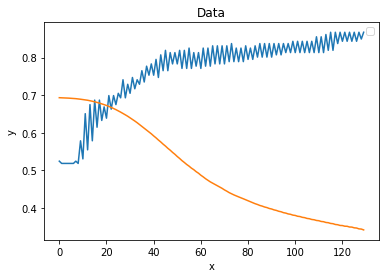

In [246]:
plt.plot(train.history['acc'])
plt.plot(train.history['loss'])
#plt.plot(X_train, y_train, 'bo', label = 'Train'); 
#plt.plot(X_test, y_test, 'r+', label = 'Test')
#plt.plot(X_test, model.predict(X_test,batch_size=5,verbose=1), 'b-', linewidth = 2, label = 'True Function')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Data');

In [247]:
#model.predict(X_test,batch_size=5,verbose=1)

# 7) fit model wit validation (with history)

In [248]:
history= model.fit(X_train, y_train, epochs = num_epochs, batch_size=num_batch, validation_split=.10, verbose = 2)

Train on 149 samples, validate on 17 samples
Epoch 1/130
149/149 - 0s - loss: 0.3266 - acc: 0.8523 - val_loss: 0.5010 - val_acc: 0.7059
Epoch 2/130
149/149 - 0s - loss: 0.3253 - acc: 0.8859 - val_loss: 0.4664 - val_acc: 0.8235
Epoch 3/130
149/149 - 0s - loss: 0.3235 - acc: 0.8523 - val_loss: 0.5014 - val_acc: 0.7059
Epoch 4/130
149/149 - 0s - loss: 0.3218 - acc: 0.8859 - val_loss: 0.4676 - val_acc: 0.8235
Epoch 5/130
149/149 - 0s - loss: 0.3196 - acc: 0.8523 - val_loss: 0.4995 - val_acc: 0.7059
Epoch 6/130
149/149 - 0s - loss: 0.3181 - acc: 0.8859 - val_loss: 0.4683 - val_acc: 0.8235
Epoch 7/130
149/149 - 0s - loss: 0.3167 - acc: 0.8523 - val_loss: 0.5004 - val_acc: 0.7059
Epoch 8/130
149/149 - 0s - loss: 0.3160 - acc: 0.8859 - val_loss: 0.4679 - val_acc: 0.8235
Epoch 9/130
149/149 - 0s - loss: 0.3149 - acc: 0.8523 - val_loss: 0.5031 - val_acc: 0.7059
Epoch 10/130
149/149 - 0s - loss: 0.3145 - acc: 0.8859 - val_loss: 0.4676 - val_acc: 0.8235
Epoch 11/130
149/149 - 0s - loss: 0.3134 - a

Epoch 90/130
149/149 - 0s - loss: 0.2487 - acc: 0.9128 - val_loss: 0.4583 - val_acc: 0.8235
Epoch 91/130
149/149 - 0s - loss: 0.2482 - acc: 0.8926 - val_loss: 0.5053 - val_acc: 0.7059
Epoch 92/130
149/149 - 0s - loss: 0.2481 - acc: 0.9128 - val_loss: 0.4573 - val_acc: 0.8235
Epoch 93/130
149/149 - 0s - loss: 0.2471 - acc: 0.8926 - val_loss: 0.5050 - val_acc: 0.7059
Epoch 94/130
149/149 - 0s - loss: 0.2465 - acc: 0.9128 - val_loss: 0.4572 - val_acc: 0.8235
Epoch 95/130
149/149 - 0s - loss: 0.2454 - acc: 0.8926 - val_loss: 0.5034 - val_acc: 0.7059
Epoch 96/130
149/149 - 0s - loss: 0.2449 - acc: 0.9128 - val_loss: 0.4576 - val_acc: 0.8235
Epoch 97/130
149/149 - 0s - loss: 0.2438 - acc: 0.8926 - val_loss: 0.5021 - val_acc: 0.7059
Epoch 98/130
149/149 - 0s - loss: 0.2431 - acc: 0.9128 - val_loss: 0.4571 - val_acc: 0.8235
Epoch 99/130
149/149 - 0s - loss: 0.2422 - acc: 0.8926 - val_loss: 0.5016 - val_acc: 0.7059
Epoch 100/130
149/149 - 0s - loss: 0.2415 - acc: 0.9128 - val_loss: 0.4569 - val

In [249]:
test_error_rate = model.evaluate(X_test, y_test, verbose=2)
test_error_rate

42/42 - 0s - loss: 0.4502 - acc: 0.8810


[0.4502421901339576, 0.88095236]

In [250]:
print(
      "{} : {:.2f}%".format(model.metrics_names[1],
              test_error_rate[1]*100))
print(
      "{} : {:.2f}%".format(model.metrics_names[0],
              test_error_rate[0]*100))
#You can run the code again to see how the model perform

acc : 88.10%
loss : 45.02%


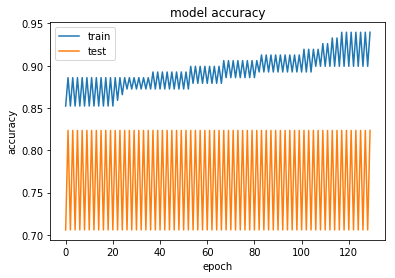

In [251]:
# # summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

42/42 [==============================] - 1s 14ms/sample


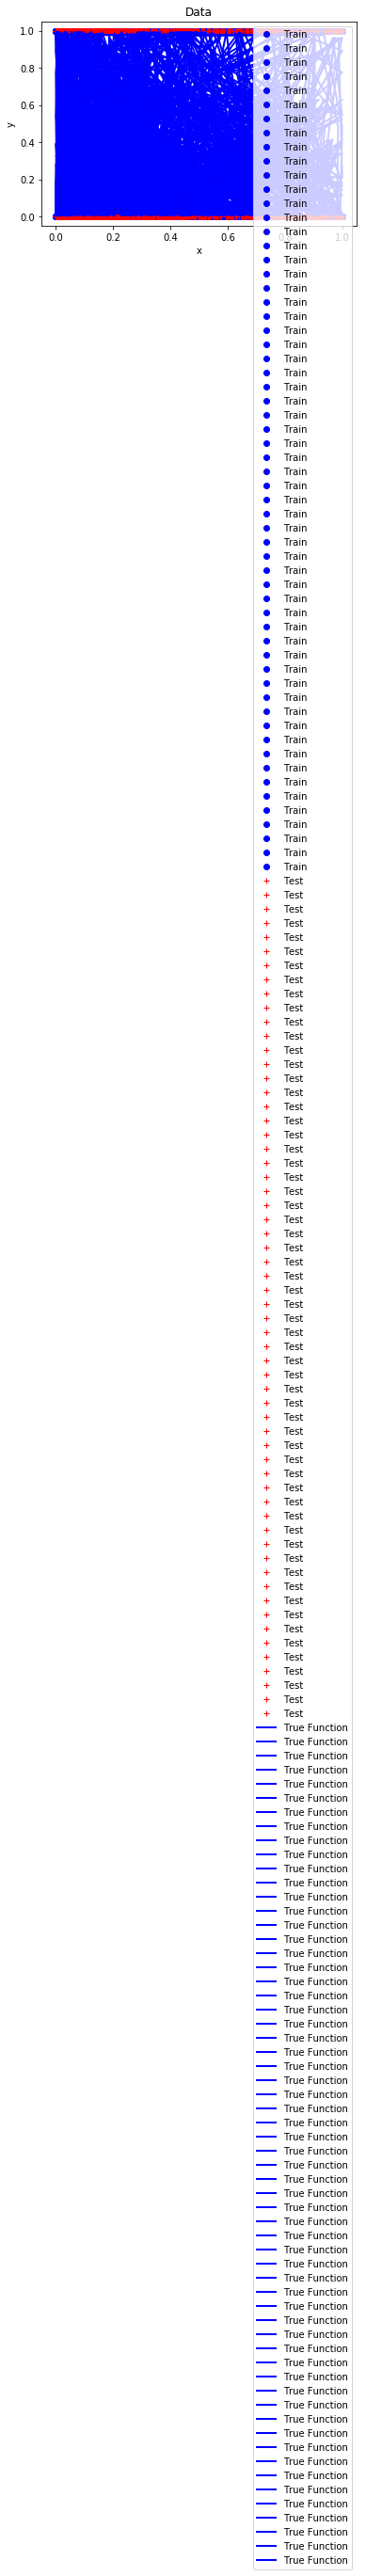

In [252]:
#plt.plot(train.history['acc'])
plt.plot(X_train, y_train, 'bo', label = 'Train'); 
plt.plot(X_test, y_test, 'r+', label = 'Test')
plt.plot(X_test, model.predict(X_test,batch_size=5,verbose=1), 'b-', linewidth = 2, label = 'True Function')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Data');

# 9) Introduce k-fold, as data is limited

In [253]:
model = create_model()
model.fit(X_train, y_train, epochs = num_epochs, batch_size = num_batch, verbose = 2)
scores = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/130
166/166 - 1s - loss: 0.6932 - acc: 0.4759
Epoch 2/130
166/166 - 0s - loss: 0.6931 - acc: 0.5120
Epoch 3/130
166/166 - 0s - loss: 0.6930 - acc: 0.5181
Epoch 4/130
166/166 - 0s - loss: 0.6929 - acc: 0.5181
Epoch 5/130
166/166 - 0s - loss: 0.6928 - acc: 0.5181
Epoch 6/130
166/166 - 0s - loss: 0.6927 - acc: 0.5181
Epoch 7/130
166/166 - 0s - loss: 0.6925 - acc: 0.5181
Epoch 8/130
166/166 - 0s - loss: 0.6924 - acc: 0.5181
Epoch 9/130
166/166 - 0s - loss: 0.6922 - acc: 0.5181
Epoch 10/130
166/166 - 0s - loss: 0.6921 - acc: 0.5181
Epoch 11/130
166/166 - 0s - loss: 0.6918 - acc: 0.5181
Epoch 12/130
166/166 - 0s - loss: 0.6916 - acc: 0.5181
Epoch 13/130
166/166 - 0s - loss: 0.6913 - acc: 0.5181
Epoch 14/130
166/166 - 0s - loss: 0.6911 - acc: 0.5301
Epoch 15/130
166/166 - 0s - loss: 0.6908 - acc: 0.5361
Epoch 16/130
166/166 - 0s - loss: 0.6904 - acc: 0.5602
Epoch 17/130
166/166 - 0s - loss: 0.6900 - acc: 0.5663
Epoch 18/130
166/166 - 0s - loss: 0.6895 - acc: 0.5843
Epoch 19/130
166/16

In [265]:
cvscores = []
estimator = KerasClassifier(build_fn=create_baseline, epochs=num_epochs, batch_size=num_batch, verbose=2)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold

StratifiedKFold(n_splits=10, random_state=7, shuffle=True)

In [258]:
for train, test in kfold.split(X, encoded_y):
    model = create_model()
    model.fit(X[train], encoded_y[train], epochs = num_epochs, batch_size = num_batch, verbose = 2)
    scores = model.evaluate(X[test], encoded_y[test], verbose=2)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/130
200/200 - 3s - loss: 0.6932 - acc: 0.4650
Epoch 2/130
200/200 - 0s - loss: 0.6931 - acc: 0.5150
Epoch 3/130
200/200 - 0s - loss: 0.6930 - acc: 0.5550
Epoch 4/130
200/200 - 0s - loss: 0.6929 - acc: 0.5350
Epoch 5/130
200/200 - 0s - loss: 0.6928 - acc: 0.5350
Epoch 6/130
200/200 - 0s - loss: 0.6927 - acc: 0.5350
Epoch 7/130
200/200 - 0s - loss: 0.6926 - acc: 0.5350
Epoch 8/130
200/200 - 0s - loss: 0.6925 - acc: 0.5350
Epoch 9/130
200/200 - 0s - loss: 0.6923 - acc: 0.5350
Epoch 10/130
200/200 - 0s - loss: 0.6922 - acc: 0.5350
Epoch 11/130
200/200 - 0s - loss: 0.6920 - acc: 0.5350
Epoch 12/130
200/200 - 0s - loss: 0.6919 - acc: 0.5350
Epoch 13/130
200/200 - 0s - loss: 0.6917 - acc: 0.5350
Epoch 14/130
200/200 - 0s - loss: 0.6915 - acc: 0.5350
Epoch 15/130
200/200 - 0s - loss: 0.6912 - acc: 0.5350
Epoch 16/130
200/200 - 0s - loss: 0.6910 - acc: 0.5350
Epoch 17/130
200/200 - 0s - loss: 0.6907 - acc: 0.5350
Epoch 18/130
200/200 - 0s - loss: 0.6904 - acc: 0.5350
Epoch 19/130
200/20

Epoch 19/130
200/200 - 0s - loss: 0.6892 - acc: 0.5350
Epoch 20/130
200/200 - 0s - loss: 0.6888 - acc: 0.5350
Epoch 21/130
200/200 - 0s - loss: 0.6883 - acc: 0.5350
Epoch 22/130
200/200 - 0s - loss: 0.6878 - acc: 0.5350
Epoch 23/130
200/200 - 0s - loss: 0.6873 - acc: 0.5350
Epoch 24/130
200/200 - 0s - loss: 0.6866 - acc: 0.5350
Epoch 25/130
200/200 - 0s - loss: 0.6860 - acc: 0.5350
Epoch 26/130
200/200 - 0s - loss: 0.6853 - acc: 0.5350
Epoch 27/130
200/200 - 0s - loss: 0.6845 - acc: 0.5350
Epoch 28/130
200/200 - 0s - loss: 0.6837 - acc: 0.5350
Epoch 29/130
200/200 - 0s - loss: 0.6827 - acc: 0.5350
Epoch 30/130
200/200 - 0s - loss: 0.6817 - acc: 0.5350
Epoch 31/130
200/200 - 0s - loss: 0.6806 - acc: 0.5350
Epoch 32/130
200/200 - 0s - loss: 0.6795 - acc: 0.5350
Epoch 33/130
200/200 - 0s - loss: 0.6782 - acc: 0.5350
Epoch 34/130
200/200 - 0s - loss: 0.6769 - acc: 0.5350
Epoch 35/130
200/200 - 0s - loss: 0.6754 - acc: 0.5350
Epoch 36/130
200/200 - 0s - loss: 0.6739 - acc: 0.5350
Epoch 37/1

Epoch 37/130
200/200 - 0s - loss: 0.6693 - acc: 0.6800
Epoch 38/130
200/200 - 0s - loss: 0.6670 - acc: 0.6750
Epoch 39/130
200/200 - 0s - loss: 0.6646 - acc: 0.6750
Epoch 40/130
200/200 - 0s - loss: 0.6619 - acc: 0.6800
Epoch 41/130
200/200 - 0s - loss: 0.6590 - acc: 0.6900
Epoch 42/130
200/200 - 0s - loss: 0.6559 - acc: 0.6900
Epoch 43/130
200/200 - 0s - loss: 0.6526 - acc: 0.6850
Epoch 44/130
200/200 - 0s - loss: 0.6490 - acc: 0.6850
Epoch 45/130
200/200 - 0s - loss: 0.6452 - acc: 0.6850
Epoch 46/130
200/200 - 0s - loss: 0.6412 - acc: 0.6850
Epoch 47/130
200/200 - 0s - loss: 0.6368 - acc: 0.6850
Epoch 48/130
200/200 - 0s - loss: 0.6323 - acc: 0.6850
Epoch 49/130
200/200 - 0s - loss: 0.6274 - acc: 0.6850
Epoch 50/130
200/200 - 0s - loss: 0.6224 - acc: 0.6900
Epoch 51/130
200/200 - 0s - loss: 0.6170 - acc: 0.7000
Epoch 52/130
200/200 - 0s - loss: 0.6114 - acc: 0.7000
Epoch 53/130
200/200 - 0s - loss: 0.6055 - acc: 0.7100
Epoch 54/130
200/200 - 0s - loss: 0.5994 - acc: 0.7200
Epoch 55/1

Epoch 55/130
200/200 - 0s - loss: 0.5999 - acc: 0.7000
Epoch 56/130
200/200 - 0s - loss: 0.5952 - acc: 0.7050
Epoch 57/130
200/200 - 0s - loss: 0.5904 - acc: 0.7100
Epoch 58/130
200/200 - 0s - loss: 0.5856 - acc: 0.7100
Epoch 59/130
200/200 - 0s - loss: 0.5809 - acc: 0.7200
Epoch 60/130
200/200 - 0s - loss: 0.5763 - acc: 0.7250
Epoch 61/130
200/200 - 0s - loss: 0.5718 - acc: 0.7350
Epoch 62/130
200/200 - 0s - loss: 0.5676 - acc: 0.7450
Epoch 63/130
200/200 - 0s - loss: 0.5636 - acc: 0.7600
Epoch 64/130
200/200 - 0s - loss: 0.5597 - acc: 0.7650
Epoch 65/130
200/200 - 0s - loss: 0.5561 - acc: 0.7750
Epoch 66/130
200/200 - 0s - loss: 0.5526 - acc: 0.7700
Epoch 67/130
200/200 - 0s - loss: 0.5493 - acc: 0.7650
Epoch 68/130
200/200 - 0s - loss: 0.5459 - acc: 0.7600
Epoch 69/130
200/200 - 0s - loss: 0.5426 - acc: 0.7750
Epoch 70/130
200/200 - 0s - loss: 0.5393 - acc: 0.7750
Epoch 71/130
200/200 - 0s - loss: 0.5359 - acc: 0.7750
Epoch 72/130
200/200 - 0s - loss: 0.5324 - acc: 0.7800
Epoch 73/1

Epoch 73/130
200/200 - 0s - loss: 0.5014 - acc: 0.7850
Epoch 74/130
200/200 - 0s - loss: 0.4956 - acc: 0.7900
Epoch 75/130
200/200 - 0s - loss: 0.4897 - acc: 0.7900
Epoch 76/130
200/200 - 0s - loss: 0.4838 - acc: 0.7900
Epoch 77/130
200/200 - 0s - loss: 0.4778 - acc: 0.7950
Epoch 78/130
200/200 - 0s - loss: 0.4718 - acc: 0.8000
Epoch 79/130
200/200 - 0s - loss: 0.4659 - acc: 0.7950
Epoch 80/130
200/200 - 0s - loss: 0.4600 - acc: 0.7950
Epoch 81/130
200/200 - 0s - loss: 0.4541 - acc: 0.8000
Epoch 82/130
200/200 - 0s - loss: 0.4483 - acc: 0.8000
Epoch 83/130
200/200 - 0s - loss: 0.4424 - acc: 0.8000
Epoch 84/130
200/200 - 0s - loss: 0.4366 - acc: 0.8150
Epoch 85/130
200/200 - 0s - loss: 0.4308 - acc: 0.8150
Epoch 86/130
200/200 - 0s - loss: 0.4251 - acc: 0.8200
Epoch 87/130
200/200 - 0s - loss: 0.4193 - acc: 0.8250
Epoch 88/130
200/200 - 0s - loss: 0.4136 - acc: 0.8300
Epoch 89/130
200/200 - 0s - loss: 0.4080 - acc: 0.8350
Epoch 90/130
200/200 - 0s - loss: 0.4025 - acc: 0.8350
Epoch 91/1

Epoch 91/130
200/200 - 0s - loss: 0.3922 - acc: 0.8500
Epoch 92/130
200/200 - 0s - loss: 0.3889 - acc: 0.8500
Epoch 93/130
200/200 - 0s - loss: 0.3857 - acc: 0.8550
Epoch 94/130
200/200 - 0s - loss: 0.3826 - acc: 0.8500
Epoch 95/130
200/200 - 0s - loss: 0.3796 - acc: 0.8450
Epoch 96/130
200/200 - 0s - loss: 0.3768 - acc: 0.8450
Epoch 97/130
200/200 - 0s - loss: 0.3739 - acc: 0.8450
Epoch 98/130
200/200 - 0s - loss: 0.3711 - acc: 0.8450
Epoch 99/130
200/200 - 0s - loss: 0.3685 - acc: 0.8450
Epoch 100/130
200/200 - 0s - loss: 0.3658 - acc: 0.8450
Epoch 101/130
200/200 - 0s - loss: 0.3633 - acc: 0.8500
Epoch 102/130
200/200 - 0s - loss: 0.3607 - acc: 0.8500
Epoch 103/130
200/200 - 0s - loss: 0.3582 - acc: 0.8500
Epoch 104/130
200/200 - 0s - loss: 0.3556 - acc: 0.8500
Epoch 105/130
200/200 - 0s - loss: 0.3530 - acc: 0.8550
Epoch 106/130
200/200 - 0s - loss: 0.3504 - acc: 0.8500
Epoch 107/130
200/200 - 0s - loss: 0.3477 - acc: 0.8550
Epoch 108/130
200/200 - 0s - loss: 0.3451 - acc: 0.8550
E

Epoch 109/130
200/200 - 0s - loss: 0.3365 - acc: 0.8700
Epoch 110/130
200/200 - 0s - loss: 0.3341 - acc: 0.8700
Epoch 111/130
200/200 - 0s - loss: 0.3317 - acc: 0.8650
Epoch 112/130
200/200 - 0s - loss: 0.3295 - acc: 0.8600
Epoch 113/130
200/200 - 0s - loss: 0.3273 - acc: 0.8700
Epoch 114/130
200/200 - 0s - loss: 0.3250 - acc: 0.8550
Epoch 115/130
200/200 - 0s - loss: 0.3227 - acc: 0.8700
Epoch 116/130
200/200 - 0s - loss: 0.3203 - acc: 0.8600
Epoch 117/130
200/200 - 0s - loss: 0.3181 - acc: 0.8650
Epoch 118/130
200/200 - 0s - loss: 0.3159 - acc: 0.8700
Epoch 119/130
200/200 - 0s - loss: 0.3136 - acc: 0.8650
Epoch 120/130
200/200 - 0s - loss: 0.3113 - acc: 0.8750
Epoch 121/130
200/200 - 0s - loss: 0.3090 - acc: 0.8750
Epoch 122/130
200/200 - 0s - loss: 0.3068 - acc: 0.8800
Epoch 123/130
200/200 - 0s - loss: 0.3044 - acc: 0.8750
Epoch 124/130
200/200 - 0s - loss: 0.3020 - acc: 0.8800
Epoch 125/130
200/200 - 0s - loss: 0.2996 - acc: 0.8850
Epoch 126/130
200/200 - 0s - loss: 0.2972 - acc:

Epoch 127/130
201/201 - 0s - loss: 0.2551 - acc: 0.8955
Epoch 128/130
201/201 - 0s - loss: 0.2522 - acc: 0.9005
Epoch 129/130
201/201 - 0s - loss: 0.2493 - acc: 0.8955
Epoch 130/130
201/201 - 0s - loss: 0.2464 - acc: 0.9005
7/7 - 2s - loss: 0.2621 - acc: 0.8571
acc: 85.71%
Epoch 1/130
201/201 - 4s - loss: 0.6932 - acc: 0.4478
Epoch 2/130
201/201 - 0s - loss: 0.6931 - acc: 0.6119
Epoch 3/130
201/201 - 0s - loss: 0.6929 - acc: 0.5323
Epoch 4/130
201/201 - 0s - loss: 0.6929 - acc: 0.5323
Epoch 5/130
201/201 - 0s - loss: 0.6928 - acc: 0.5323
Epoch 6/130
201/201 - 0s - loss: 0.6927 - acc: 0.5323
Epoch 7/130
201/201 - 0s - loss: 0.6926 - acc: 0.5323
Epoch 8/130
201/201 - 0s - loss: 0.6925 - acc: 0.5323
Epoch 9/130
201/201 - 0s - loss: 0.6923 - acc: 0.5323
Epoch 10/130
201/201 - 0s - loss: 0.6922 - acc: 0.5323
Epoch 11/130
201/201 - 0s - loss: 0.6920 - acc: 0.5323
Epoch 12/130
201/201 - 0s - loss: 0.6919 - acc: 0.5323
Epoch 13/130
201/201 - 0s - loss: 0.6917 - acc: 0.5323
Epoch 14/130
201/201

Epoch 14/130
201/201 - 0s - loss: 0.6917 - acc: 0.5323
Epoch 15/130
201/201 - 0s - loss: 0.6916 - acc: 0.5323
Epoch 16/130
201/201 - 0s - loss: 0.6913 - acc: 0.5323
Epoch 17/130
201/201 - 0s - loss: 0.6911 - acc: 0.5323
Epoch 18/130
201/201 - 0s - loss: 0.6908 - acc: 0.5323
Epoch 19/130
201/201 - 0s - loss: 0.6905 - acc: 0.5323
Epoch 20/130
201/201 - 0s - loss: 0.6901 - acc: 0.5323
Epoch 21/130
201/201 - 0s - loss: 0.6898 - acc: 0.5323
Epoch 22/130
201/201 - 0s - loss: 0.6893 - acc: 0.5622
Epoch 23/130
201/201 - 0s - loss: 0.6888 - acc: 0.5672
Epoch 24/130
201/201 - 0s - loss: 0.6883 - acc: 0.5721
Epoch 25/130
201/201 - 0s - loss: 0.6877 - acc: 0.5771
Epoch 26/130
201/201 - 0s - loss: 0.6870 - acc: 0.5920
Epoch 27/130
201/201 - 0s - loss: 0.6862 - acc: 0.6070
Epoch 28/130
201/201 - 0s - loss: 0.6853 - acc: 0.6169
Epoch 29/130
201/201 - 0s - loss: 0.6844 - acc: 0.6368
Epoch 30/130
201/201 - 0s - loss: 0.6833 - acc: 0.6468
Epoch 31/130
201/201 - 0s - loss: 0.6821 - acc: 0.6617
Epoch 32/1

Epoch 32/130
201/201 - 0s - loss: 0.6809 - acc: 0.5323
Epoch 33/130
201/201 - 0s - loss: 0.6797 - acc: 0.5373
Epoch 34/130
201/201 - 0s - loss: 0.6783 - acc: 0.5473
Epoch 35/130
201/201 - 0s - loss: 0.6768 - acc: 0.5572
Epoch 36/130
201/201 - 0s - loss: 0.6752 - acc: 0.5572
Epoch 37/130
201/201 - 0s - loss: 0.6735 - acc: 0.5672
Epoch 38/130
201/201 - 0s - loss: 0.6716 - acc: 0.5771
Epoch 39/130
201/201 - 0s - loss: 0.6695 - acc: 0.5821
Epoch 40/130
201/201 - 0s - loss: 0.6673 - acc: 0.5821
Epoch 41/130
201/201 - 0s - loss: 0.6649 - acc: 0.5970
Epoch 42/130
201/201 - 0s - loss: 0.6624 - acc: 0.6169
Epoch 43/130
201/201 - 0s - loss: 0.6596 - acc: 0.6418
Epoch 44/130
201/201 - 0s - loss: 0.6567 - acc: 0.6567
Epoch 45/130
201/201 - 0s - loss: 0.6536 - acc: 0.6667
Epoch 46/130
201/201 - 0s - loss: 0.6503 - acc: 0.6617
Epoch 47/130
201/201 - 0s - loss: 0.6467 - acc: 0.6667
Epoch 48/130
201/201 - 0s - loss: 0.6429 - acc: 0.6667
Epoch 49/130
201/201 - 0s - loss: 0.6390 - acc: 0.6766
Epoch 50/1

Epoch 50/130
201/201 - 0s - loss: 0.6296 - acc: 0.6915
Epoch 51/130
201/201 - 0s - loss: 0.6249 - acc: 0.6866
Epoch 52/130
201/201 - 0s - loss: 0.6200 - acc: 0.6816
Epoch 53/130
201/201 - 0s - loss: 0.6147 - acc: 0.6766
Epoch 54/130
201/201 - 0s - loss: 0.6093 - acc: 0.6766
Epoch 55/130
201/201 - 0s - loss: 0.6036 - acc: 0.6766
Epoch 56/130
201/201 - 0s - loss: 0.5976 - acc: 0.6965
Epoch 57/130
201/201 - 0s - loss: 0.5915 - acc: 0.7015
Epoch 58/130
201/201 - 0s - loss: 0.5851 - acc: 0.7114
Epoch 59/130
201/201 - 0s - loss: 0.5785 - acc: 0.7114
Epoch 60/130
201/201 - 0s - loss: 0.5717 - acc: 0.7164
Epoch 61/130
201/201 - 0s - loss: 0.5647 - acc: 0.7214
Epoch 62/130
201/201 - 0s - loss: 0.5576 - acc: 0.7313
Epoch 63/130
201/201 - 0s - loss: 0.5503 - acc: 0.7264
Epoch 64/130
201/201 - 0s - loss: 0.5429 - acc: 0.7264
Epoch 65/130
201/201 - 0s - loss: 0.5354 - acc: 0.7363
Epoch 66/130
201/201 - 0s - loss: 0.5278 - acc: 0.7413
Epoch 67/130
201/201 - 0s - loss: 0.5203 - acc: 0.7612
Epoch 68/1

Epoch 68/130
201/201 - 0s - loss: 0.4962 - acc: 0.7761
Epoch 69/130
201/201 - 0s - loss: 0.4887 - acc: 0.7761
Epoch 70/130
201/201 - 0s - loss: 0.4814 - acc: 0.7761
Epoch 71/130
201/201 - 0s - loss: 0.4742 - acc: 0.7811
Epoch 72/130
201/201 - 0s - loss: 0.4673 - acc: 0.8010
Epoch 73/130
201/201 - 0s - loss: 0.4605 - acc: 0.7960
Epoch 74/130
201/201 - 0s - loss: 0.4540 - acc: 0.7910
Epoch 75/130
201/201 - 0s - loss: 0.4478 - acc: 0.7960
Epoch 76/130
201/201 - 0s - loss: 0.4418 - acc: 0.8060
Epoch 77/130
201/201 - 0s - loss: 0.4361 - acc: 0.8010
Epoch 78/130
201/201 - 0s - loss: 0.4306 - acc: 0.8109
Epoch 79/130
201/201 - 0s - loss: 0.4254 - acc: 0.8109
Epoch 80/130
201/201 - 0s - loss: 0.4205 - acc: 0.8209
Epoch 81/130
201/201 - 0s - loss: 0.4158 - acc: 0.8209
Epoch 82/130
201/201 - 0s - loss: 0.4113 - acc: 0.8209
Epoch 83/130
201/201 - 0s - loss: 0.4070 - acc: 0.8209
Epoch 84/130
201/201 - 0s - loss: 0.4029 - acc: 0.8358
Epoch 85/130
201/201 - 0s - loss: 0.3991 - acc: 0.8358
Epoch 86/1

Epoch 86/130
201/201 - 0s - loss: 0.3803 - acc: 0.8308
Epoch 87/130
201/201 - 0s - loss: 0.3759 - acc: 0.8259
Epoch 88/130
201/201 - 0s - loss: 0.3718 - acc: 0.8209
Epoch 89/130
201/201 - 0s - loss: 0.3679 - acc: 0.8209
Epoch 90/130
201/201 - 0s - loss: 0.3642 - acc: 0.8358
Epoch 91/130
201/201 - 0s - loss: 0.3607 - acc: 0.8408
Epoch 92/130
201/201 - 0s - loss: 0.3572 - acc: 0.8458
Epoch 93/130
201/201 - 0s - loss: 0.3539 - acc: 0.8507
Epoch 94/130
201/201 - 0s - loss: 0.3507 - acc: 0.8507
Epoch 95/130
201/201 - 0s - loss: 0.3476 - acc: 0.8557
Epoch 96/130
201/201 - 0s - loss: 0.3446 - acc: 0.8557
Epoch 97/130
201/201 - 0s - loss: 0.3417 - acc: 0.8607
Epoch 98/130
201/201 - 0s - loss: 0.3389 - acc: 0.8607
Epoch 99/130
201/201 - 0s - loss: 0.3361 - acc: 0.8607
Epoch 100/130
201/201 - 0s - loss: 0.3333 - acc: 0.8607
Epoch 101/130
201/201 - 0s - loss: 0.3307 - acc: 0.8657
Epoch 102/130
201/201 - 0s - loss: 0.3280 - acc: 0.8657
Epoch 103/130
201/201 - 0s - loss: 0.3254 - acc: 0.8657
Epoch 

Epoch 104/130
201/201 - 0s - loss: 0.3538 - acc: 0.8557
Epoch 105/130
201/201 - 0s - loss: 0.3517 - acc: 0.8557
Epoch 106/130
201/201 - 0s - loss: 0.3496 - acc: 0.8557
Epoch 107/130
201/201 - 0s - loss: 0.3477 - acc: 0.8557
Epoch 108/130
201/201 - 0s - loss: 0.3459 - acc: 0.8557
Epoch 109/130
201/201 - 0s - loss: 0.3441 - acc: 0.8557
Epoch 110/130
201/201 - 0s - loss: 0.3423 - acc: 0.8607
Epoch 111/130
201/201 - 0s - loss: 0.3405 - acc: 0.8607
Epoch 112/130
201/201 - 0s - loss: 0.3386 - acc: 0.8607
Epoch 113/130
201/201 - 0s - loss: 0.3366 - acc: 0.8657
Epoch 114/130
201/201 - 0s - loss: 0.3348 - acc: 0.8657
Epoch 115/130
201/201 - 0s - loss: 0.3330 - acc: 0.8657
Epoch 116/130
201/201 - 0s - loss: 0.3312 - acc: 0.8657
Epoch 117/130
201/201 - 0s - loss: 0.3294 - acc: 0.8657
Epoch 118/130
201/201 - 0s - loss: 0.3277 - acc: 0.8657
Epoch 119/130
201/201 - 0s - loss: 0.3259 - acc: 0.8657
Epoch 120/130
201/201 - 0s - loss: 0.3241 - acc: 0.8657
Epoch 121/130
201/201 - 0s - loss: 0.3223 - acc:

Epoch 122/130
201/201 - 0s - loss: 0.2811 - acc: 0.8905
Epoch 123/130
201/201 - 0s - loss: 0.2785 - acc: 0.8955
Epoch 124/130
201/201 - 0s - loss: 0.2759 - acc: 0.9005
Epoch 125/130
201/201 - 0s - loss: 0.2732 - acc: 0.9005
Epoch 126/130
201/201 - 0s - loss: 0.2707 - acc: 0.9005
Epoch 127/130
201/201 - 0s - loss: 0.2681 - acc: 0.9005
Epoch 128/130
201/201 - 0s - loss: 0.2656 - acc: 0.9005
Epoch 129/130
201/201 - 0s - loss: 0.2631 - acc: 0.9104
Epoch 130/130
201/201 - 0s - loss: 0.2606 - acc: 0.9104
7/7 - 2s - loss: 0.6827 - acc: 0.5714
acc: 57.14%
Epoch 1/130
201/201 - 3s - loss: 0.6931 - acc: 0.5323
Epoch 2/130
201/201 - 0s - loss: 0.6929 - acc: 0.5323
Epoch 3/130
201/201 - 0s - loss: 0.6928 - acc: 0.5323
Epoch 4/130
201/201 - 0s - loss: 0.6927 - acc: 0.5323
Epoch 5/130
201/201 - 0s - loss: 0.6925 - acc: 0.5323
Epoch 6/130
201/201 - 0s - loss: 0.6923 - acc: 0.5323
Epoch 7/130
201/201 - 0s - loss: 0.6922 - acc: 0.5323
Epoch 8/130
201/201 - 0s - loss: 0.6920 - acc: 0.5323
Epoch 9/130
20

Epoch 9/130
201/201 - 0s - loss: 0.6925 - acc: 0.5323
Epoch 10/130
201/201 - 0s - loss: 0.6924 - acc: 0.5323
Epoch 11/130
201/201 - 0s - loss: 0.6923 - acc: 0.5323
Epoch 12/130
201/201 - 0s - loss: 0.6922 - acc: 0.5323
Epoch 13/130
201/201 - 0s - loss: 0.6920 - acc: 0.5323
Epoch 14/130
201/201 - 0s - loss: 0.6919 - acc: 0.5323
Epoch 15/130
201/201 - 0s - loss: 0.6917 - acc: 0.5323
Epoch 16/130
201/201 - 0s - loss: 0.6915 - acc: 0.5323
Epoch 17/130
201/201 - 0s - loss: 0.6913 - acc: 0.5323
Epoch 18/130
201/201 - 0s - loss: 0.6911 - acc: 0.5323
Epoch 19/130
201/201 - 0s - loss: 0.6908 - acc: 0.5323
Epoch 20/130
201/201 - 0s - loss: 0.6905 - acc: 0.5323
Epoch 21/130
201/201 - 0s - loss: 0.6902 - acc: 0.5323
Epoch 22/130
201/201 - 0s - loss: 0.6898 - acc: 0.5323
Epoch 23/130
201/201 - 0s - loss: 0.6894 - acc: 0.5323
Epoch 24/130
201/201 - 0s - loss: 0.6890 - acc: 0.5323
Epoch 25/130
201/201 - 0s - loss: 0.6885 - acc: 0.5522
Epoch 26/130
201/201 - 0s - loss: 0.6879 - acc: 0.5721
Epoch 27/13

Epoch 27/130
201/201 - 0s - loss: 0.6861 - acc: 0.5871
Epoch 28/130
201/201 - 0s - loss: 0.6853 - acc: 0.5871
Epoch 29/130
201/201 - 0s - loss: 0.6844 - acc: 0.6070
Epoch 30/130
201/201 - 0s - loss: 0.6835 - acc: 0.6169
Epoch 31/130
201/201 - 0s - loss: 0.6824 - acc: 0.6368
Epoch 32/130
201/201 - 0s - loss: 0.6812 - acc: 0.6617
Epoch 33/130
201/201 - 0s - loss: 0.6799 - acc: 0.6617
Epoch 34/130
201/201 - 0s - loss: 0.6785 - acc: 0.6667
Epoch 35/130
201/201 - 0s - loss: 0.6770 - acc: 0.6617
Epoch 36/130
201/201 - 0s - loss: 0.6753 - acc: 0.6667
Epoch 37/130
201/201 - 0s - loss: 0.6734 - acc: 0.6667
Epoch 38/130
201/201 - 0s - loss: 0.6714 - acc: 0.6667
Epoch 39/130
201/201 - 0s - loss: 0.6692 - acc: 0.6716
Epoch 40/130
201/201 - 0s - loss: 0.6668 - acc: 0.6866
Epoch 41/130
201/201 - 0s - loss: 0.6643 - acc: 0.6816
Epoch 42/130
201/201 - 0s - loss: 0.6615 - acc: 0.6766
Epoch 43/130
201/201 - 0s - loss: 0.6584 - acc: 0.6766
Epoch 44/130
201/201 - 0s - loss: 0.6552 - acc: 0.6716
Epoch 45/1

Epoch 45/130
201/201 - 0s - loss: 0.6530 - acc: 0.6567
Epoch 46/130
201/201 - 0s - loss: 0.6497 - acc: 0.6468
Epoch 47/130
201/201 - 0s - loss: 0.6461 - acc: 0.6766
Epoch 48/130
201/201 - 0s - loss: 0.6423 - acc: 0.6766
Epoch 49/130
201/201 - 0s - loss: 0.6383 - acc: 0.6915
Epoch 50/130
201/201 - 0s - loss: 0.6340 - acc: 0.6915
Epoch 51/130
201/201 - 0s - loss: 0.6295 - acc: 0.6915
Epoch 52/130
201/201 - 0s - loss: 0.6248 - acc: 0.6866
Epoch 53/130
201/201 - 0s - loss: 0.6198 - acc: 0.6866
Epoch 54/130
201/201 - 0s - loss: 0.6145 - acc: 0.6866
Epoch 55/130
201/201 - 0s - loss: 0.6090 - acc: 0.6866
Epoch 56/130
201/201 - 0s - loss: 0.6033 - acc: 0.7015
Epoch 57/130
201/201 - 0s - loss: 0.5973 - acc: 0.7015
Epoch 58/130
201/201 - 0s - loss: 0.5911 - acc: 0.7065
Epoch 59/130
201/201 - 0s - loss: 0.5847 - acc: 0.7065
Epoch 60/130
201/201 - 0s - loss: 0.5780 - acc: 0.7065
Epoch 61/130
201/201 - 0s - loss: 0.5712 - acc: 0.7164
Epoch 62/130
201/201 - 0s - loss: 0.5642 - acc: 0.7313
Epoch 63/1

Epoch 63/130
201/201 - 0s - loss: 0.5378 - acc: 0.7562
Epoch 64/130
201/201 - 0s - loss: 0.5302 - acc: 0.7562
Epoch 65/130
201/201 - 0s - loss: 0.5225 - acc: 0.7512
Epoch 66/130
201/201 - 0s - loss: 0.5148 - acc: 0.7612
Epoch 67/130
201/201 - 0s - loss: 0.5071 - acc: 0.7761
Epoch 68/130
201/201 - 0s - loss: 0.4994 - acc: 0.7761
Epoch 69/130
201/201 - 0s - loss: 0.4919 - acc: 0.7811
Epoch 70/130
201/201 - 0s - loss: 0.4845 - acc: 0.7761
Epoch 71/130
201/201 - 0s - loss: 0.4771 - acc: 0.7761
Epoch 72/130
201/201 - 0s - loss: 0.4700 - acc: 0.7761
Epoch 73/130
201/201 - 0s - loss: 0.4630 - acc: 0.7811
Epoch 74/130
201/201 - 0s - loss: 0.4562 - acc: 0.7861
Epoch 75/130
201/201 - 0s - loss: 0.4495 - acc: 0.7910
Epoch 76/130
201/201 - 0s - loss: 0.4431 - acc: 0.7910
Epoch 77/130
201/201 - 0s - loss: 0.4369 - acc: 0.8010
Epoch 78/130
201/201 - 0s - loss: 0.4308 - acc: 0.8010
Epoch 79/130
201/201 - 0s - loss: 0.4250 - acc: 0.7960
Epoch 80/130
201/201 - 0s - loss: 0.4194 - acc: 0.7960
Epoch 81/1

Epoch 81/130
202/202 - 0s - loss: 0.4616 - acc: 0.8218
Epoch 82/130
202/202 - 0s - loss: 0.4536 - acc: 0.8218
Epoch 83/130
202/202 - 0s - loss: 0.4458 - acc: 0.8218
Epoch 84/130
202/202 - 0s - loss: 0.4381 - acc: 0.8218
Epoch 85/130
202/202 - 0s - loss: 0.4307 - acc: 0.8267
Epoch 86/130
202/202 - 0s - loss: 0.4236 - acc: 0.8317
Epoch 87/130
202/202 - 0s - loss: 0.4167 - acc: 0.8366
Epoch 88/130
202/202 - 0s - loss: 0.4101 - acc: 0.8366
Epoch 89/130
202/202 - 0s - loss: 0.4038 - acc: 0.8366
Epoch 90/130
202/202 - 0s - loss: 0.3979 - acc: 0.8366
Epoch 91/130
202/202 - 0s - loss: 0.3922 - acc: 0.8416
Epoch 92/130
202/202 - 0s - loss: 0.3868 - acc: 0.8416
Epoch 93/130
202/202 - 0s - loss: 0.3816 - acc: 0.8366
Epoch 94/130
202/202 - 0s - loss: 0.3768 - acc: 0.8366
Epoch 95/130
202/202 - 0s - loss: 0.3721 - acc: 0.8465
Epoch 96/130
202/202 - 0s - loss: 0.3678 - acc: 0.8416
Epoch 97/130
202/202 - 0s - loss: 0.3636 - acc: 0.8416
Epoch 98/130
202/202 - 0s - loss: 0.3596 - acc: 0.8465
Epoch 99/1

Epoch 99/130
202/202 - 0s - loss: 0.3588 - acc: 0.8416
Epoch 100/130
202/202 - 0s - loss: 0.3560 - acc: 0.8465
Epoch 101/130
202/202 - 0s - loss: 0.3533 - acc: 0.8465
Epoch 102/130
202/202 - 0s - loss: 0.3507 - acc: 0.8515
Epoch 103/130
202/202 - 0s - loss: 0.3481 - acc: 0.8564
Epoch 104/130
202/202 - 0s - loss: 0.3457 - acc: 0.8614
Epoch 105/130
202/202 - 0s - loss: 0.3433 - acc: 0.8564
Epoch 106/130
202/202 - 0s - loss: 0.3409 - acc: 0.8663
Epoch 107/130
202/202 - 0s - loss: 0.3386 - acc: 0.8663
Epoch 108/130
202/202 - 0s - loss: 0.3365 - acc: 0.8663
Epoch 109/130
202/202 - 0s - loss: 0.3343 - acc: 0.8614
Epoch 110/130
202/202 - 0s - loss: 0.3323 - acc: 0.8713
Epoch 111/130
202/202 - 0s - loss: 0.3302 - acc: 0.8614
Epoch 112/130
202/202 - 0s - loss: 0.3282 - acc: 0.8713
Epoch 113/130
202/202 - 0s - loss: 0.3262 - acc: 0.8663
Epoch 114/130
202/202 - 0s - loss: 0.3243 - acc: 0.8762
Epoch 115/130
202/202 - 0s - loss: 0.3223 - acc: 0.8762
Epoch 116/130
202/202 - 0s - loss: 0.3204 - acc: 

Epoch 117/130
202/202 - 0s - loss: 0.3132 - acc: 0.8762
Epoch 118/130
202/202 - 0s - loss: 0.3108 - acc: 0.8812
Epoch 119/130
202/202 - 0s - loss: 0.3084 - acc: 0.8812
Epoch 120/130
202/202 - 0s - loss: 0.3059 - acc: 0.8812
Epoch 121/130
202/202 - 0s - loss: 0.3034 - acc: 0.8812
Epoch 122/130
202/202 - 0s - loss: 0.3009 - acc: 0.8812
Epoch 123/130
202/202 - 0s - loss: 0.2984 - acc: 0.8861
Epoch 124/130
202/202 - 0s - loss: 0.2958 - acc: 0.8812
Epoch 125/130
202/202 - 0s - loss: 0.2932 - acc: 0.8812
Epoch 126/130
202/202 - 0s - loss: 0.2906 - acc: 0.8812
Epoch 127/130
202/202 - 0s - loss: 0.2881 - acc: 0.8861
Epoch 128/130
202/202 - 0s - loss: 0.2855 - acc: 0.8911
Epoch 129/130
202/202 - 0s - loss: 0.2829 - acc: 0.8960
Epoch 130/130
202/202 - 0s - loss: 0.2802 - acc: 0.8911
6/6 - 2s - loss: 0.1205 - acc: 1.0000
acc: 100.00%
Epoch 1/130
202/202 - 4s - loss: 0.6932 - acc: 0.4950
Epoch 2/130
202/202 - 0s - loss: 0.6930 - acc: 0.5347
Epoch 3/130
202/202 - 0s - loss: 0.6929 - acc: 0.5347
Epo

Epoch 4/130
202/202 - 0s - loss: 0.6929 - acc: 0.5347
Epoch 5/130
202/202 - 0s - loss: 0.6928 - acc: 0.5347
Epoch 6/130
202/202 - 0s - loss: 0.6927 - acc: 0.5347
Epoch 7/130
202/202 - 0s - loss: 0.6926 - acc: 0.5347
Epoch 8/130
202/202 - 0s - loss: 0.6925 - acc: 0.5347
Epoch 9/130
202/202 - 0s - loss: 0.6924 - acc: 0.5347
Epoch 10/130
202/202 - 0s - loss: 0.6923 - acc: 0.5347
Epoch 11/130
202/202 - 0s - loss: 0.6921 - acc: 0.5347
Epoch 12/130
202/202 - 0s - loss: 0.6920 - acc: 0.5347
Epoch 13/130
202/202 - 0s - loss: 0.6918 - acc: 0.5347
Epoch 14/130
202/202 - 0s - loss: 0.6916 - acc: 0.5347
Epoch 15/130
202/202 - 0s - loss: 0.6914 - acc: 0.5347
Epoch 16/130
202/202 - 0s - loss: 0.6912 - acc: 0.5347
Epoch 17/130
202/202 - 0s - loss: 0.6909 - acc: 0.5347
Epoch 18/130
202/202 - 0s - loss: 0.6906 - acc: 0.5347
Epoch 19/130
202/202 - 0s - loss: 0.6903 - acc: 0.5347
Epoch 20/130
202/202 - 0s - loss: 0.6899 - acc: 0.5347
Epoch 21/130
202/202 - 0s - loss: 0.6895 - acc: 0.5347
Epoch 22/130
202

Epoch 22/130
202/202 - 0s - loss: 0.6900 - acc: 0.5347
Epoch 23/130
202/202 - 0s - loss: 0.6896 - acc: 0.5347
Epoch 24/130
202/202 - 0s - loss: 0.6892 - acc: 0.5347
Epoch 25/130
202/202 - 0s - loss: 0.6887 - acc: 0.5347
Epoch 26/130
202/202 - 0s - loss: 0.6882 - acc: 0.5347
Epoch 27/130
202/202 - 0s - loss: 0.6877 - acc: 0.5347
Epoch 28/130
202/202 - 0s - loss: 0.6871 - acc: 0.5347
Epoch 29/130
202/202 - 0s - loss: 0.6864 - acc: 0.5347
Epoch 30/130
202/202 - 0s - loss: 0.6857 - acc: 0.5347
Epoch 31/130
202/202 - 0s - loss: 0.6849 - acc: 0.5347
Epoch 32/130
202/202 - 0s - loss: 0.6840 - acc: 0.5347
Epoch 33/130
202/202 - 0s - loss: 0.6831 - acc: 0.5347
Epoch 34/130
202/202 - 0s - loss: 0.6820 - acc: 0.5347
Epoch 35/130
202/202 - 0s - loss: 0.6809 - acc: 0.5347
Epoch 36/130
202/202 - 0s - loss: 0.6797 - acc: 0.5347
Epoch 37/130
202/202 - 0s - loss: 0.6784 - acc: 0.5347
Epoch 38/130
202/202 - 0s - loss: 0.6769 - acc: 0.5347
Epoch 39/130
202/202 - 0s - loss: 0.6753 - acc: 0.5347
Epoch 40/1

Epoch 40/130
202/202 - 0s - loss: 0.6749 - acc: 0.5347
Epoch 41/130
202/202 - 0s - loss: 0.6733 - acc: 0.5347
Epoch 42/130
202/202 - 0s - loss: 0.6715 - acc: 0.5347
Epoch 43/130
202/202 - 0s - loss: 0.6696 - acc: 0.5347
Epoch 44/130
202/202 - 0s - loss: 0.6675 - acc: 0.5347
Epoch 45/130
202/202 - 0s - loss: 0.6653 - acc: 0.5347
Epoch 46/130
202/202 - 0s - loss: 0.6629 - acc: 0.5693
Epoch 47/130
202/202 - 0s - loss: 0.6604 - acc: 0.5743
Epoch 48/130
202/202 - 0s - loss: 0.6577 - acc: 0.5842
Epoch 49/130
202/202 - 0s - loss: 0.6549 - acc: 0.5891
Epoch 50/130
202/202 - 0s - loss: 0.6519 - acc: 0.5941
Epoch 51/130
202/202 - 0s - loss: 0.6487 - acc: 0.6089
Epoch 52/130
202/202 - 0s - loss: 0.6454 - acc: 0.6238
Epoch 53/130
202/202 - 0s - loss: 0.6420 - acc: 0.6436
Epoch 54/130
202/202 - 0s - loss: 0.6383 - acc: 0.6584
Epoch 55/130
202/202 - 0s - loss: 0.6344 - acc: 0.6584
Epoch 56/130
202/202 - 0s - loss: 0.6304 - acc: 0.6584
Epoch 57/130
202/202 - 0s - loss: 0.6261 - acc: 0.6733
Epoch 58/1

Epoch 58/130
202/202 - 0s - loss: 0.5608 - acc: 0.7475
Epoch 59/130
202/202 - 0s - loss: 0.5532 - acc: 0.7525
Epoch 60/130
202/202 - 0s - loss: 0.5453 - acc: 0.7525
Epoch 61/130
202/202 - 0s - loss: 0.5374 - acc: 0.7624
Epoch 62/130
202/202 - 0s - loss: 0.5295 - acc: 0.7475
Epoch 63/130
202/202 - 0s - loss: 0.5216 - acc: 0.7574
Epoch 64/130
202/202 - 0s - loss: 0.5138 - acc: 0.7673
Epoch 65/130
202/202 - 0s - loss: 0.5059 - acc: 0.7723
Epoch 66/130
202/202 - 0s - loss: 0.4982 - acc: 0.7723
Epoch 67/130
202/202 - 0s - loss: 0.4906 - acc: 0.7871
Epoch 68/130
202/202 - 0s - loss: 0.4831 - acc: 0.7871
Epoch 69/130
202/202 - 0s - loss: 0.4757 - acc: 0.7871
Epoch 70/130
202/202 - 0s - loss: 0.4685 - acc: 0.7871
Epoch 71/130
202/202 - 0s - loss: 0.4616 - acc: 0.7871
Epoch 72/130
202/202 - 0s - loss: 0.4548 - acc: 0.7921
Epoch 73/130
202/202 - 0s - loss: 0.4483 - acc: 0.7921
Epoch 74/130
202/202 - 0s - loss: 0.4421 - acc: 0.7871
Epoch 75/130
202/202 - 0s - loss: 0.4361 - acc: 0.7921
Epoch 76/1

Epoch 76/130
202/202 - 0s - loss: 0.4281 - acc: 0.8020
Epoch 77/130
202/202 - 0s - loss: 0.4229 - acc: 0.8069
Epoch 78/130
202/202 - 0s - loss: 0.4180 - acc: 0.8069
Epoch 79/130
202/202 - 0s - loss: 0.4133 - acc: 0.8119
Epoch 80/130
202/202 - 0s - loss: 0.4087 - acc: 0.8168
Epoch 81/130
202/202 - 0s - loss: 0.4043 - acc: 0.8218
Epoch 82/130
202/202 - 0s - loss: 0.4000 - acc: 0.8317
Epoch 83/130
202/202 - 0s - loss: 0.3959 - acc: 0.8317
Epoch 84/130
202/202 - 0s - loss: 0.3920 - acc: 0.8416
Epoch 85/130
202/202 - 0s - loss: 0.3881 - acc: 0.8416
Epoch 86/130
202/202 - 0s - loss: 0.3843 - acc: 0.8515
Epoch 87/130
202/202 - 0s - loss: 0.3806 - acc: 0.8515
Epoch 88/130
202/202 - 0s - loss: 0.3769 - acc: 0.8515
Epoch 89/130
202/202 - 0s - loss: 0.3733 - acc: 0.8564
Epoch 90/130
202/202 - 0s - loss: 0.3697 - acc: 0.8564
Epoch 91/130
202/202 - 0s - loss: 0.3664 - acc: 0.8564
Epoch 92/130
202/202 - 0s - loss: 0.3631 - acc: 0.8614
Epoch 93/130
202/202 - 0s - loss: 0.3598 - acc: 0.8663
Epoch 94/1

In [266]:
results = cross_val_score(estimator, X_test, y_test, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/130
37/37 - 5s - loss: 0.6597 - acc: 0.6216
Epoch 2/130
37/37 - 0s - loss: 0.6523 - acc: 0.5676
Epoch 3/130
37/37 - 0s - loss: 0.6575 - acc: 0.5946
Epoch 4/130
37/37 - 1s - loss: 0.6745 - acc: 0.5946
Epoch 5/130
37/37 - 0s - loss: 0.6636 - acc: 0.5946
Epoch 6/130
37/37 - 0s - loss: 0.6644 - acc: 0.6216
Epoch 7/130
37/37 - 0s - loss: 0.6830 - acc: 0.5946
Epoch 8/130
37/37 - 0s - loss: 0.6276 - acc: 0.5946
Epoch 9/130
37/37 - 0s - loss: 0.6432 - acc: 0.5946
Epoch 10/130
37/37 - 0s - loss: 0.6403 - acc: 0.6216
Epoch 11/130
37/37 - 0s - loss: 0.6849 - acc: 0.6216
Epoch 12/130
37/37 - 0s - loss: 0.6632 - acc: 0.6216
Epoch 13/130
37/37 - 0s - loss: 0.6731 - acc: 0.5946
Epoch 14/130
37/37 - 0s - loss: 0.6550 - acc: 0.5946
Epoch 15/130
37/37 - 0s - loss: 0.6764 - acc: 0.5946
Epoch 16/130
37/37 - 0s - loss: 0.6609 - acc: 0.6216
Epoch 17/130
37/37 - 0s - loss: 0.6503 - acc: 0.5946
Epoch 18/130
37/37 - 0s - loss: 0.6420 - acc: 0.5946
Epoch 19/130
37/37 - 0s - loss: 0.6193 - acc: 0.5946
Ep

Epoch 25/130
37/37 - 0s - loss: 0.6675 - acc: 0.5946
Epoch 26/130
37/37 - 0s - loss: 0.6641 - acc: 0.5946
Epoch 27/130
37/37 - 0s - loss: 0.6646 - acc: 0.6216
Epoch 28/130
37/37 - 0s - loss: 0.6742 - acc: 0.5946
Epoch 29/130
37/37 - 0s - loss: 0.6510 - acc: 0.6216
Epoch 30/130
37/37 - 0s - loss: 0.6509 - acc: 0.6216
Epoch 31/130
37/37 - 0s - loss: 0.6346 - acc: 0.5946
Epoch 32/130
37/37 - 0s - loss: 0.6556 - acc: 0.5946
Epoch 33/130
37/37 - 0s - loss: 0.6493 - acc: 0.6216
Epoch 34/130
37/37 - 0s - loss: 0.6575 - acc: 0.6216
Epoch 35/130
37/37 - 0s - loss: 0.6467 - acc: 0.6216
Epoch 36/130
37/37 - 0s - loss: 0.6462 - acc: 0.6486
Epoch 37/130
37/37 - 0s - loss: 0.6262 - acc: 0.6216
Epoch 38/130
37/37 - 0s - loss: 0.6318 - acc: 0.5946
Epoch 39/130
37/37 - 0s - loss: 0.6741 - acc: 0.5946
Epoch 40/130
37/37 - 0s - loss: 0.6191 - acc: 0.6757
Epoch 41/130
37/37 - 0s - loss: 0.6316 - acc: 0.6486
Epoch 42/130
37/37 - 0s - loss: 0.6345 - acc: 0.6757
Epoch 43/130
37/37 - 0s - loss: 0.6546 - acc: 

Epoch 49/130
37/37 - 0s - loss: 0.6159 - acc: 0.6486
Epoch 50/130
37/37 - 0s - loss: 0.5999 - acc: 0.7027
Epoch 51/130
37/37 - 0s - loss: 0.6111 - acc: 0.6216
Epoch 52/130
37/37 - 0s - loss: 0.6489 - acc: 0.5676
Epoch 53/130
37/37 - 0s - loss: 0.5967 - acc: 0.6486
Epoch 54/130
37/37 - 0s - loss: 0.5852 - acc: 0.7027
Epoch 55/130
37/37 - 0s - loss: 0.5772 - acc: 0.6757
Epoch 56/130
37/37 - 0s - loss: 0.5904 - acc: 0.7027
Epoch 57/130
37/37 - 0s - loss: 0.5973 - acc: 0.7297
Epoch 58/130
37/37 - 0s - loss: 0.5519 - acc: 0.6757
Epoch 59/130
37/37 - 0s - loss: 0.5473 - acc: 0.7027
Epoch 60/130
37/37 - 0s - loss: 0.6595 - acc: 0.5946
Epoch 61/130
37/37 - 0s - loss: 0.6093 - acc: 0.6757
Epoch 62/130
37/37 - 0s - loss: 0.6168 - acc: 0.6216
Epoch 63/130
37/37 - 0s - loss: 0.5931 - acc: 0.6757
Epoch 64/130
37/37 - 0s - loss: 0.6256 - acc: 0.5405
Epoch 65/130
37/37 - 0s - loss: 0.5641 - acc: 0.7027
Epoch 66/130
37/37 - 0s - loss: 0.6001 - acc: 0.6757
Epoch 67/130
37/37 - 0s - loss: 0.6035 - acc: 

Epoch 73/130
37/37 - 0s - loss: 0.6370 - acc: 0.6757
Epoch 74/130
37/37 - 0s - loss: 0.5575 - acc: 0.7027
Epoch 75/130
37/37 - 0s - loss: 0.5879 - acc: 0.6757
Epoch 76/130
37/37 - 0s - loss: 0.6520 - acc: 0.6216
Epoch 77/130
37/37 - 0s - loss: 0.5625 - acc: 0.7838
Epoch 78/130
37/37 - 0s - loss: 0.6105 - acc: 0.6216
Epoch 79/130
37/37 - 0s - loss: 0.5375 - acc: 0.8108
Epoch 80/130
37/37 - 0s - loss: 0.5619 - acc: 0.8108
Epoch 81/130
37/37 - 0s - loss: 0.5876 - acc: 0.6216
Epoch 82/130
37/37 - 0s - loss: 0.5029 - acc: 0.7838
Epoch 83/130
37/37 - 0s - loss: 0.5643 - acc: 0.7568
Epoch 84/130
37/37 - 0s - loss: 0.5137 - acc: 0.7568
Epoch 85/130
37/37 - 0s - loss: 0.5369 - acc: 0.8108
Epoch 86/130
37/37 - 0s - loss: 0.5258 - acc: 0.7568
Epoch 87/130
37/37 - 0s - loss: 0.5525 - acc: 0.7568
Epoch 88/130
37/37 - 0s - loss: 0.6157 - acc: 0.6486
Epoch 89/130
37/37 - 0s - loss: 0.5432 - acc: 0.6486
Epoch 90/130
37/37 - 0s - loss: 0.5067 - acc: 0.7838
Epoch 91/130
37/37 - 0s - loss: 0.5507 - acc: 

Epoch 97/130
37/37 - 0s - loss: 0.5549 - acc: 0.6486
Epoch 98/130
37/37 - 0s - loss: 0.5742 - acc: 0.7568
Epoch 99/130
37/37 - 0s - loss: 0.5570 - acc: 0.7568
Epoch 100/130
37/37 - 0s - loss: 0.4959 - acc: 0.7568
Epoch 101/130
37/37 - 0s - loss: 0.5900 - acc: 0.6757
Epoch 102/130
37/37 - 0s - loss: 0.6095 - acc: 0.7297
Epoch 103/130
37/37 - 0s - loss: 0.5662 - acc: 0.7297
Epoch 104/130
37/37 - 0s - loss: 0.5517 - acc: 0.6757
Epoch 105/130
37/37 - 0s - loss: 0.5789 - acc: 0.6757
Epoch 106/130
37/37 - 0s - loss: 0.5704 - acc: 0.7297
Epoch 107/130
37/37 - 0s - loss: 0.5470 - acc: 0.7297
Epoch 108/130
37/37 - 0s - loss: 0.5578 - acc: 0.7027
Epoch 109/130
37/37 - 0s - loss: 0.5224 - acc: 0.7568
Epoch 110/130
37/37 - 0s - loss: 0.4534 - acc: 0.7838
Epoch 111/130
37/37 - 0s - loss: 0.5363 - acc: 0.6757
Epoch 112/130
37/37 - 0s - loss: 0.6088 - acc: 0.6757
Epoch 113/130
37/37 - 0s - loss: 0.5099 - acc: 0.8108
Epoch 114/130
37/37 - 0s - loss: 0.5709 - acc: 0.7027
Epoch 115/130
37/37 - 0s - loss

Epoch 121/130
38/38 - 0s - loss: 0.4731 - acc: 0.7105
Epoch 122/130
38/38 - 0s - loss: 0.5173 - acc: 0.6842
Epoch 123/130
38/38 - 0s - loss: 0.5581 - acc: 0.7105
Epoch 124/130
38/38 - 0s - loss: 0.3882 - acc: 0.8947
Epoch 125/130
38/38 - 0s - loss: 0.4951 - acc: 0.7895
Epoch 126/130
38/38 - 0s - loss: 0.4887 - acc: 0.7895
Epoch 127/130
38/38 - 0s - loss: 0.4481 - acc: 0.7632
Epoch 128/130
38/38 - 0s - loss: 0.4736 - acc: 0.8421
Epoch 129/130
38/38 - 0s - loss: 0.4377 - acc: 0.8158
Epoch 130/130
38/38 - 0s - loss: 0.4672 - acc: 0.7632
4/4 - 2s - loss: 0.6289 - acc: 0.5000
Epoch 1/130
38/38 - 3s - loss: 0.7014 - acc: 0.5263
Epoch 2/130
38/38 - 0s - loss: 0.6855 - acc: 0.5526
Epoch 3/130
38/38 - 0s - loss: 0.6801 - acc: 0.5789
Epoch 4/130
38/38 - 0s - loss: 0.6565 - acc: 0.6316
Epoch 5/130
38/38 - 0s - loss: 0.6521 - acc: 0.5789
Epoch 6/130
38/38 - 0s - loss: 0.6717 - acc: 0.6316
Epoch 7/130
38/38 - 0s - loss: 0.6586 - acc: 0.5789
Epoch 8/130
38/38 - 0s - loss: 0.6602 - acc: 0.6053
Epoch 

Epoch 14/130
39/39 - 0s - loss: 0.6407 - acc: 0.6923
Epoch 15/130
39/39 - 0s - loss: 0.6229 - acc: 0.6923
Epoch 16/130
39/39 - 0s - loss: 0.6380 - acc: 0.6410
Epoch 17/130
39/39 - 0s - loss: 0.6248 - acc: 0.7436
Epoch 18/130
39/39 - 0s - loss: 0.6203 - acc: 0.6923
Epoch 19/130
39/39 - 0s - loss: 0.6704 - acc: 0.5641
Epoch 20/130
39/39 - 0s - loss: 0.6339 - acc: 0.6410
Epoch 21/130
39/39 - 0s - loss: 0.6197 - acc: 0.6410
Epoch 22/130
39/39 - 0s - loss: 0.6150 - acc: 0.7179
Epoch 23/130
39/39 - 0s - loss: 0.6234 - acc: 0.6923
Epoch 24/130
39/39 - 0s - loss: 0.6258 - acc: 0.6923
Epoch 25/130
39/39 - 0s - loss: 0.6491 - acc: 0.5897
Epoch 26/130
39/39 - 0s - loss: 0.6299 - acc: 0.6667
Epoch 27/130
39/39 - 0s - loss: 0.6188 - acc: 0.6667
Epoch 28/130
39/39 - 0s - loss: 0.6291 - acc: 0.6410
Epoch 29/130
39/39 - 0s - loss: 0.5869 - acc: 0.7179
Epoch 30/130
39/39 - 0s - loss: 0.5805 - acc: 0.6667
Epoch 31/130
39/39 - 0s - loss: 0.6442 - acc: 0.5897
Epoch 32/130
39/39 - 0s - loss: 0.5810 - acc: 

Epoch 38/130
39/39 - 0s - loss: 0.6089 - acc: 0.6410
Epoch 39/130
39/39 - 0s - loss: 0.6238 - acc: 0.6154
Epoch 40/130
39/39 - 0s - loss: 0.6175 - acc: 0.5897
Epoch 41/130
39/39 - 0s - loss: 0.6184 - acc: 0.6154
Epoch 42/130
39/39 - 0s - loss: 0.6143 - acc: 0.6410
Epoch 43/130
39/39 - 0s - loss: 0.6232 - acc: 0.6667
Epoch 44/130
39/39 - 0s - loss: 0.6111 - acc: 0.6410
Epoch 45/130
39/39 - 0s - loss: 0.6117 - acc: 0.6667
Epoch 46/130
39/39 - 0s - loss: 0.6303 - acc: 0.6410
Epoch 47/130
39/39 - 0s - loss: 0.5668 - acc: 0.6410
Epoch 48/130
39/39 - 0s - loss: 0.6238 - acc: 0.6154
Epoch 49/130
39/39 - 0s - loss: 0.5900 - acc: 0.6154
Epoch 50/130
39/39 - 0s - loss: 0.6039 - acc: 0.6923
Epoch 51/130
39/39 - 0s - loss: 0.6111 - acc: 0.6410
Epoch 52/130
39/39 - 0s - loss: 0.5784 - acc: 0.6410
Epoch 53/130
39/39 - 0s - loss: 0.5527 - acc: 0.6923
Epoch 54/130
39/39 - 0s - loss: 0.5864 - acc: 0.6667
Epoch 55/130
39/39 - 0s - loss: 0.5813 - acc: 0.5897
Epoch 56/130
39/39 - 0s - loss: 0.6046 - acc: 

Epoch 62/130
39/39 - 0s - loss: 0.5340 - acc: 0.7436
Epoch 63/130
39/39 - 0s - loss: 0.5848 - acc: 0.6410
Epoch 64/130
39/39 - 0s - loss: 0.5767 - acc: 0.7179
Epoch 65/130
39/39 - 0s - loss: 0.5898 - acc: 0.6667
Epoch 66/130
39/39 - 0s - loss: 0.5976 - acc: 0.6154
Epoch 67/130
39/39 - 0s - loss: 0.5779 - acc: 0.6923
Epoch 68/130
39/39 - 0s - loss: 0.5553 - acc: 0.6923
Epoch 69/130
39/39 - 0s - loss: 0.5224 - acc: 0.6667
Epoch 70/130
39/39 - 0s - loss: 0.5375 - acc: 0.7692
Epoch 71/130
39/39 - 0s - loss: 0.5703 - acc: 0.7179
Epoch 72/130
39/39 - 0s - loss: 0.5607 - acc: 0.7436
Epoch 73/130
39/39 - 0s - loss: 0.5018 - acc: 0.7692
Epoch 74/130
39/39 - 0s - loss: 0.5817 - acc: 0.7436
Epoch 75/130
39/39 - 0s - loss: 0.5169 - acc: 0.7692
Epoch 76/130
39/39 - 0s - loss: 0.5924 - acc: 0.6667
Epoch 77/130
39/39 - 0s - loss: 0.5387 - acc: 0.6923
Epoch 78/130
39/39 - 0s - loss: 0.5863 - acc: 0.6923
Epoch 79/130
39/39 - 0s - loss: 0.5142 - acc: 0.7436
Epoch 80/130
39/39 - 0s - loss: 0.5323 - acc: 

In [267]:
print(results)
print(
     f"95% CI Accuracy: "
     f"{round(results.mean(), 2)} "
     f"(+/- {round(results.std() * 2, 2)})"
)

[1.         0.60000002 0.80000001 0.80000001 0.60000002 0.5
 0.75       0.66666669 0.66666669 0.66666669]
95% CI Accuracy: 0.71 (+/- 0.27)


In [268]:
# test model on test set
model = create_model()
model.fit(X_train, y_train)

166/166 [==============================] - 5s 31ms/sample - loss: 0.6931 - acc: 0.5181


In [269]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=num_batch, verbose=0)))

In [270]:
pipeline = Pipeline(estimators)
kFold = StratifiedKFold(n_splits=10,shuffle=True,random_state=seed)

In [271]:
results = cross_val_score(pipeline, X_test, y_test, cv=kFold)
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Result: 73.67% (19.58%)
